<a href="https://colab.research.google.com/github/gysdnow/NLPWorks/blob/master/WordsProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 文本詞語處理
Jieba斷詞、
FIDF關鍵詞抽取

Word2Vec建模、
相似詞抽取、
斷句處理效能比較

---

##資料集說明
攜程網-酒店評論資料
ChnSentiCorp_htl_all 

5322 Postive, 

2444 Negtive, 

[資料來源](https://github.com/SophonPlus/ChineseNlpCorpus/blob/master/datasets/ChnSentiCorp_htl_all/intro.ipynb)

---

##補充資料
GoogleNews-vectors-negative300.bin.gz

google 透過 十億多筆新聞資料所訓練的 Word2Vec Model (Eng)

[檔案位置](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)



In [0]:
import pandas as pd

In [0]:
#Colab
path = 'drive/My Drive/Colab Notebooks/'
#Local
#path = './'
df = pd.read_csv(path + 'ChnSentiCorp_htl_all.csv')
df.label.value_counts()

1    5322
0    2444
Name: label, dtype: int64

In [0]:
!pip install -q jieba
import jieba 

# 結巴斷詞範例

## jieba.cut("我来到北京清华大学", cut_all=True)

> 【全模式】: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学

## jieba.cut("我来到北京清华大学", cut_all=False)

> 【精确模式】: 我/ 来到/ 北京/ 清华大学

## jieba.cut("他来到了网易杭研大厦")

>【新词识别】：他, 来到, 了, 网易, 杭研, 大厦    (此处，“杭研”并没有在词典中，但是也被Viterbi算法识别出来了)

## jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")

> 【搜索引擎模式】： 小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造

In [0]:
#採用新詞識別
df['jieba_cut'] = df.review.apply(lambda x: list(jieba.cut(str(x))))

In [0]:
df

,label,review,jieba_cut
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较...","[距离, 川沙, 公路, 较近, ,, 但是, 公交, 指示, 不, 对, ,, 如果, 是..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!,"[商务, 大床, 房, ，, 房间, 很大, ，, 床有, 2M, 宽, ，, 整体, 感觉..."
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。,"[早餐, 太, 差, ，, 无论, 去, 多少, 人, ，, 那边, 也, 不加, 食品, ..."
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...,"[宾馆, 在, 小, 街道, 上, ，, 不大好, 找, ，, 但, 还好, 北京, 热心,..."
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风","[CBD, 中心, ,, 周围, 没什么, 店铺, ,, 说, 5, 星, 有点, 勉强, ..."
...,...,...,...
7761,0,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...,"[尼斯, 酒店, 的, 几大, 特点, ：, 噪音, 大, 、, 环境, 差, 、, 配置,..."
7762,0,盐城来了很多次，第一次住盐阜宾馆，我的确很失望整个墙壁黑咕隆咚的，好像被烟熏过一样家具非常的...,"[盐城, 来, 了, 很, 多次, ，, 第一次, 住, 盐阜, 宾馆, ，, 我, 的确,..."
7763,0,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...,"[看, 照片, 觉得, 还, 挺不错, 的, ，, 又, 是, 4, 星级, 的, ，, 但..."
7764,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...,"[我们, 去, 盐城, 的, 时候, 那里, 的, 最低气温, 只有, 4, 度, ，, 晚..."


#TF-IDF 關鍵詞抽取

In [0]:
import jieba.analyse
jieba.analyse.extract_tags(df.review[10], topK=10, withWeight=False, allowPOS=())

['冰箱', '桌子', '感觉', '特色', '正好', '寝具', '配在一起', '标间', '加菲猫', '3.5']

# TextRank 關鍵詞抽取

In [0]:
jieba.analyse.textrank(df.review[10], topK=10, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v'))

['桌子', '感觉', '冰箱', '协调', '有点', '特色', '工作', '评价', '上网', '客房']

# Tokenize & indexing 

In [0]:
result = jieba.tokenize(df.review[5], mode='search')
for tk in result:
    print("<{:5}>\t start: {} \t end:{}".format(tk[0],tk[1],tk[2]))

<来说   >	 start: 2 	 end:4
<总的来说 >	 start: 0 	 end:4
<，    >	 start: 4 	 end:5
<这样   >	 start: 5 	 end:7
<的    >	 start: 7 	 end:8
<酒店   >	 start: 8 	 end:10
<配    >	 start: 10 	 end:11
<这样   >	 start: 11 	 end:13
<的    >	 start: 13 	 end:14
<价格   >	 start: 14 	 end:16
<还    >	 start: 16 	 end:17
<算    >	 start: 17 	 end:18
<可以   >	 start: 18 	 end:20
<，    >	 start: 20 	 end:21
<希望   >	 start: 21 	 end:23
<他    >	 start: 23 	 end:24
<赶快   >	 start: 24 	 end:26
<装修   >	 start: 26 	 end:28
<，    >	 start: 28 	 end:29
<给    >	 start: 29 	 end:30
<我    >	 start: 30 	 end:31
<的    >	 start: 31 	 end:32
<客人   >	 start: 32 	 end:34
<留些   >	 start: 34 	 end:36
<好    >	 start: 36 	 end:37
<的    >	 start: 37 	 end:38
<印象   >	 start: 38 	 end:40


# Word2Vec 模型
##斷句前 

文本數:7,765

平均字數:128

字數中位數:84

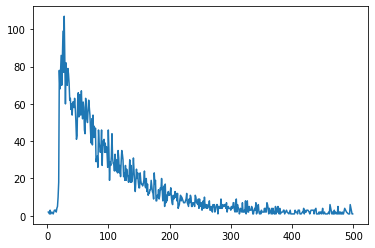

In [0]:
#500字內 的 篇數分布
#X軸為篇數 
#Y軸為字數
df.review.str.len().value_counts().sort_index()[:500].plot()

In [0]:
df.review.str.len().describe()

count    7765.000000
mean      128.518609
std       143.629370
min         2.000000
25%        45.000000
50%        84.000000
75%       154.000000
max      2924.000000
Name: review, dtype: float64

# 安裝Word2Vec 套件
取相似詞 Top 10

In [0]:
!pip install -q gensim
from gensim.models.word2vec import Word2Vec

def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df


# 全文斷詞後，直接用 Word2Vec 建模

In [0]:
wv_model = Word2Vec(df.jieba_cut)
#尋找相似詞 top10
most_similar(wv_model,['酒店','房间','硬件','价格'],10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,酒店,cos,房间,cos,硬件,cos,价格,cos
0,饭店,0.737156,床,0.800760,软件,0.934986,房价,0.921848
1,店,0.724040,洗手间,0.779274,酒店设施,0.909656,价钱,0.828698
2,如家,0.637314,卫生间,0.778058,方面,0.901275,便宜,0.825944
3,价位,0.617868,空间,0.773016,内部,0.895138,价位,0.774556
4,城市,0.609988,房间内,0.749950,条件,0.893961,378,0.765632
5,评价,0.609773,窗户,0.747342,一流,0.879864,性价比,0.751362
6,宾馆,0.593999,很大,0.747025,环境,0.876628,比,0.738778
7,中,0.581743,楼层,0.745283,各,0.876616,贵,0.732392
8,住宿,0.571223,面积,0.744198,设施,0.875550,对得起,0.717570
9,评分,0.570940,浴室,0.742106,整体,0.870948,实惠,0.712047


# 全文斷詞後，直接用 Word2Vec 建模
# 設定維度 = 250 , iter 8 次

In [0]:
wv_model_iter = Word2Vec(df.jieba_cut, size=250, iter=8)
#尋找相似詞 top10
most_similar(wv_model_iter,['酒店','房间','硬件','价格'],10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,酒店,cos,房间,cos,硬件,cos,价格,cos
0,店,0.720402,卫生间,0.648387,软件,0.896753,房价,0.916905
1,饭店,0.681714,房间内,0.632758,水准,0.835112,价钱,0.851620
2,宾馆,0.656186,空间,0.607401,酒店设施,0.827004,价位,0.745924
3,城市,0.567181,套间,0.606997,整体,0.799646,价,0.720438
4,价位,0.529863,洗手间,0.606929,外观,0.795895,性价比,0.703375
5,大厦,0.502172,房,0.605887,条件,0.792738,太贵,0.694404
6,才定,0.499729,床,0.598306,内部,0.784254,便宜,0.686487
7,山庄,0.490893,套房,0.596891,各,0.775184,不值,0.651661
8,度假村,0.483745,房子,0.576412,来讲,0.774191,条件,0.628992
9,其,0.465956,烟味,0.572568,一流,0.768642,188,0.625722


# Word2Vec 模型
##斷句後
文本數:101,459

平均字數:8

字數中位數:8


In [0]:
sent_df = pd.DataFrame(res_reviews)
sent_df[0].str.len().describe()

count    101459.000000
mean          8.791384
std           5.680800
min           1.000000
25%           5.000000
50%           8.000000
75%          11.000000
max         367.000000
Name: 0, dtype: float64

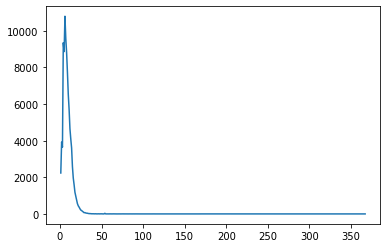

In [0]:
sent_df[0].str.len().value_counts().sort_index().plot()

In [0]:
reviews = list(df.review)

def split_sentence(articles,char_list):
  res = articles
  #統一所有標點符號為'全型逗號'
  for c in char_list:
    res = [str(x).replace(c,'，') for x in res]
  
  sentences = []
  
  #斷句
  for s in res:
    sentences += s.split('，')
  
  #刪除空白
  #sentences = [list(jieba.cut(i)) for i in sentences if i] 
  sentences = [i for i in sentences if i] 
  return sentences

char_list=[',','！','!','?','？','.','。','"','、','（','(','）',')',':','：',';','；','“','~','．','…']
res_reviews = split_sentence(reviews,char_list)

#全文斷句後，再斷詞
#直接用 Word2Vec 建模


In [0]:
wv_model_sentence = Word2Vec(res_reviews)
#尋找相似詞 top10
most_similar(wv_model_sentence,['酒店','房间','硬件','价格'],10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,酒店,cos,房间,cos,硬件,cos,价格,cos
0,饭店,0.827245,卫生间,0.700566,软件,0.949422,房价,0.917330
1,宾馆,0.779875,洗手间,0.649195,水平,0.919609,价钱,0.817651
2,店,0.720168,房间内,0.627587,内部,0.905105,价位,0.779507
3,价位,0.616445,浴室,0.626016,条件,0.891198,性价比,0.736289
4,城市,0.603783,但,0.623210,来讲,0.884382,便宜,0.689712
5,大酒店,0.597991,浴缸,0.622066,水准,0.883236,390,0.661284
6,家,0.575177,空间,0.611415,整体,0.875647,价,0.639219
7,当地,0.568566,院子,0.610414,各,0.866805,评分,0.618364
8,中,0.565927,大堂,0.604457,设施,0.863101,270,0.615922
9,作为,0.565668,毛巾,0.604262,环境,0.859725,160,0.612320


#全文斷句後，再斷詞
#設定維度 = 250 , iter 8 次

In [0]:
wv_model_sentence_iter = Word2Vec(res_reviews,size=250,iter=8)
#尋找相似詞 top10
most_similar(wv_model_sentence_iter,['酒店','房间','硬件','价格'],10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,酒店,cos,房间,cos,硬件,cos,价格,cos
0,宾馆,0.788654,卫生间,0.648474,软件,0.905160,房价,0.925271
1,饭店,0.784307,洗手间,0.611801,内部,0.843215,价钱,0.843699
2,店,0.752483,房间内,0.588120,外观,0.810293,价位,0.783038
3,城市,0.577810,套房,0.584392,来讲,0.805034,性价比,0.716965
4,过程,0.573309,客房,0.580884,条件,0.798558,价,0.701556
5,价位,0.508317,大堂,0.573359,整体,0.798480,协议价,0.607239
6,号称,0.499641,房,0.570314,酒店设施,0.788128,价格比,0.602202
7,住宿,0.498643,大厅,0.569338,配套,0.786720,评分,0.599529
8,大酒店,0.496951,空间,0.565988,设备,0.785495,便宜,0.596686
9,情况,0.496939,房子,0.565633,水准,0.779255,协议,0.595006


#結論
1.Word2Vec 效能仰賴於 Jieba 斷詞結果，故調整 Jieba 中的各式停用詞、常用詞等字典相當重要

2.文本數越多，建模效果越好

3.長文會影響 Word2Vec 建模效果，但影響幅度不是太大
( 因為SKIP-GRAM 或 CBOW 還是有 Window 限制)

[PCA視覺化](
https://medium.com/pyladies-taiwan/%E8%87%AA%E7%84%B6%E8%AA%9E%E8%A8%80%E8%99%95%E7%90%86%E5%85%A5%E9%96%80-word2vec%E5%B0%8F%E5%AF%A6%E4%BD%9C-f8832d9677c8)
